In [48]:
import pandas as pd
import os
import numpy as np
import random
import sys
from tqdm.auto import tqdm
import librosa
random.seed(42)

In [49]:
from bnunicodenormalizer import Normalizer 
import unicodedata

import re
bnorm = Normalizer()

In [ ]:
sys.path.append("../")

In [50]:
from experiments.normalize import *

In [2]:
from pydub.utils import mediainfo
import os
from multiprocessing import Pool

from pydub import AudioSegment

def get_audio_duration(audio_file_path):
    audio = AudioSegment.from_file(audio_file_path)
    duration_seconds = len(audio) / 1000  # Convert milliseconds to seconds
    return duration_seconds

def process_audio_file(audio_file_path):
    duration_seconds = get_audio_duration(audio_file_path)
    return audio_file_path, duration_seconds

In [1]:
import pandas as pd
train = pd.read_pickle("../data/train_full_v2.pkl")
train['path'] = "../data/" + train['path']

In [15]:
train

,id,sentence,split,path,use
0,00001dddd002,কোন মহান রাষ্ট্রের নাগরিক হতে চাও,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
1,00001e0bc131,আমি তোমার কষ্টটা বুঝছি কিন্তু এটা সঠিক পথ না,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
2,000024b3d810,নাচ শেষ হওয়ার পর সকলে শরীর ধুয়ে একসঙ্গে ভোজন...,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
3,000028220ab3,হুমম ওহ হেই দেখো,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
4,00003147472f,নাটক সাংবাদিকতা শিক্ষার উপরে তার উচ্চতর প্রশিক...,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
...,...,...,...,...,...
653032,efff4f9255ef,এদিকে সময় হয়ে এল যাবার,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
653033,efff6b0db996,দ্বার খুলিয়াই দেখিল চন্দনগুঁড়া ও ধুনার গন্ধে...,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
653034,efff72a2e276,এই লউন তরবারি এই লউন উষ্ণীষ,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0
653035,efff9dc31af3,সুলেমানই আমাকে জোর করে খাইয়েছে মামা,train,/home/benedikt/deeplearning/bengaliai-speech/d...,1.0


In [3]:
all_files = train['path'].tolist()

In [4]:
%%time
num_processes = 16

with Pool(processes=num_processes) as pool:
    results = pool.map(process_audio_file, all_files)

CPU times: user 512 ms, sys: 331 ms, total: 842 ms
Wall time: 1h 2min 30s


In [6]:
time = [x[1] for x in results]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

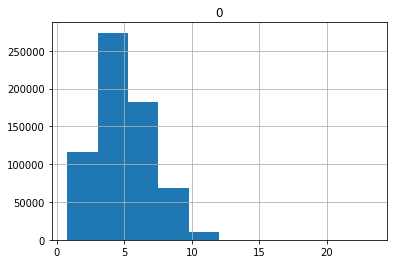

In [11]:
pd.DataFrame(time).hist()

In [13]:
train['duration'] = time

In [14]:
train.to_pickle("../data/train_with_duration.pkl")